In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import ai_prentice_wasserstein

In [2]:
def gen_data(dim, N_traj=200, N_samples=200):
    dyn = np.random.uniform(size=(N_traj, N_samples, dim))
    cons = np.stack([np.random.uniform(size=(N_traj, dim))] * N_samples, axis=1)
    data = np.concatenate((dyn, cons), axis=2)
    return data

def compute_scores_on_the_synthetic_data(plt, dim, N_traj=200, N_samples=200):
    data = gen_data(dim, N_traj, N_samples)

    ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice(f"{dim} dimensional synthetic data")
    ai_prentice.fit(data)
       
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    ai_prentice._plot_scores(axes[0])
    ai_prentice._plot_score_diffs(axes[1], dim)

    return data, ai_prentice.scores

def threshold_boundaries(N_experiments, N_traj=200, N_samples=200):
    lower_boundaries = []
    upper_boundaries = []
    
    for _ in tqdm(range(N_experiments)):
        for dim in range(1, 4):
            data = gen_data(dim, N_traj, N_samples)

            ai_prentice = ai_prentice_wasserstein.DimensionalityPrentice(f"{dim} dimensional synthetic data", verbosity=0)
            ai_prentice.fit(data)
            
            scores = np.array(ai_prentice.scores)
            score_diffs = scores[:-1] - scores[1:]
        
            for d in range(dim - 1):
                upper_boundaries.append(score_diffs[d])
            lower_boundaries.append(score_diffs[dim - 1])
    return lower_boundaries, upper_boundaries

In [3]:
# for dim in range(1, 4):
#     print(f"conservation dimensionality: {dim}")
#     compute_scores_on_the_synthetic_data(plt, dim)
#     plt.show()

In [4]:
low_boundaries, up_boundaries = threshold_boundaries(100)

  1%|          | 1/100 [09:22<15:27:22, 562.04s/it]


SystemError: CPUDispatcher(<function _optimize_layout_generic_single_epoch at 0x7f91c4a0ab80>) returned a result with an error set

In [ ]:
plt.hist(low_boundaries, label="lower", bins=20)
plt.hist(up_boundaries, label="upper", bins=20)
plt.legend()
plt.show()

In [ ]:
(np.array(low_boundaries) < 0.01).sum() / 300

In [ ]:
(np.array(up_boundaries) > 0.01).sum() / 300

In [ ]:
# np.savez("lower_boundaries.npz", bound=low_boundaries)
# np.savez("upper_boundaries.npz", bound=up_boundaries)

In [5]:
lb = np.load("lower_boundaries.npz")["bound"]
ub = np.load("upper_boundaries.npz")["bound"]

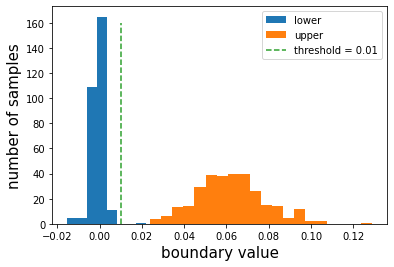

In [8]:
plt.hist(lb, label="lower", bins=20)
plt.hist(ub, label="upper", bins=20)
plt.plot([0.01, 0.01], [0, 160], linestyle="--", label="threshold = 0.01")
plt.legend()
plt.xlabel("boundary value", fontsize=15)
plt.ylabel("number of samples", fontsize=15)
plt.savefig("threshold.pdf")
plt.show()

In [ ]:
lb[lb > 0.01]